# Iris Data Classification

## Introduction

This notebook is my Ipython notebook and this is made with reference to Dr. Randal S Olson's <a href="https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb">notebook</a>, to get started with Ipython notebooks.

## Licence

Please refer to the repository <a href="https://github.com/darthv115/Machine-Learning-and-Data-Science-Projects/blob/master/Licence.md">Licence</a> file.

## Required Libraries

You need to have python installed on your system. Refer to this <a href="https://www.python.org/downloads/">link</a> to get python on your system.

You also need to have Ipython notebook installed. For that, refer <a href="http://jupyter.readthedocs.io/en/latest/install.html">here</a>.

Required python packages:
- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn

To install them using <code>pip</code>:
<pre><code>pip install numpy pandas matplotlib seaborn scikit-learn</code></pre>

To get the latest versions, update <code>pip</code>:
<pre><code>pip install --upgrade pip</code></pre>

## The problem

I am using the popular Iris <a href="https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/raw/master/example-data-science-notebook/iris-data.csv">dataset</a> to classify the flowers according to their species (<code>Iris-setosa</code>, <code>Iris-versicolor</code> and <code>Iris-virginica</code>).

For those who might point out, this is not the actual data set, but rather a small part of it and it also has some intended anomalies inserted by **Dr. Randal S Olson**, which I will try to rectify in this notebook.

## Step 1: Answering the question

Some particular questions need to be answered regarding the **goals** of the projects and how it will be achieved, before you do anything with the data.

We need to define the problem a bit more and also define the metrics for our success before starting to work.

Some of the questions are:
<pre>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?</pre>

I am trying to classify the species of the flower based on four features: sepal length, sepal width, petal length, petal width.

    Did you define the metric for success before beginning?
    
Since classification is done, we can use accuracy (% of correctly predicted flowers) as a metric.

    Did you understand the context for the question and the scientific or business application?
    
This can be used in a smartphone app where you take a picture of a flower and get the species of that flower back.

    Did you record the experimental design?

The field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology.

    Did you consider whether the question could be answered with the available data?
    
The data set we will be using consits of only 3 types of **Iris** flowers. So, it would be able to classify those 3 species. For a more general classifier, we would need more data.

And as Randal Olson says,
***Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.***

## Step 2: Checking the data

Checking the data for any errors. It's vital that we spot these errors before we invest our time in analysing the data.

- Is there anything wrong with the data?
- Are there any quirks (pattern)?
- Do I need to fix or remove any data?

We will use pandas' dataframes here.

In [1]:
import pandas as pd
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Bonus Tip**: If your data is missing some values and it follows a certain pattern (for example here, all the missing data is replaced by the string 'NA'), you can tell pandas to treate such rows as missing data.
This can be done by specifying the 'na_values' attribute as 'NA'.
    <pre><code>iris_data = pd.read_csv('data/iris_data.csv', na_values='NA')</code></pre>

Here, it already knew how to handle missing values. So, I need not specify the parameter 'na_values'.

In [2]:
null_data = iris_data[iris_data.isnull().any(axis=1)]
null_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [3]:
# gives useful stastistical info (summary) about the data
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


So, what do we understand from the summary. One fine thing to notice is that it shows that the count for <code>petal_width_cm</code> is 145, i.e. 5 data points are missing, as we expected pandas to handle them and it did.
We can't get much insight from tables like unless we know in advance that our data should lie in some particular range. That's why it is better to visualize the data to find certain anomalies or erroneous data, that we may have to fix. We will use matplotlib to visualize the data.

In [4]:
# lines starting with '%' are called magic commands
# tells the interpreter to show the plots inside the notebook
%matplotlib inline

# import required libraries
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
# shows the rows with missing values
iris_data[iris_data.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [6]:
# drops the rows with missing values
no_null = iris_data.dropna()
print "Dims of no_null:",no_null.shape

# will return an empty dataframe since we got rid of the missing value rows
no_null[no_null.isnull().any(axis=1)]

Dims of no_null: (145, 5)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


#### Scatterplot Matrices
We will create a **scatterplot** matrix for visualization. A scatterplot matrix plots the distribution of each column along the diagonals, then plots a scatterplot matrix for combinations of each variable.
They make up for an efficient tool to look for errors in data.

We can even color the data by its class to see classwise trends, by setting the 'hue' parameter to 'class'. 

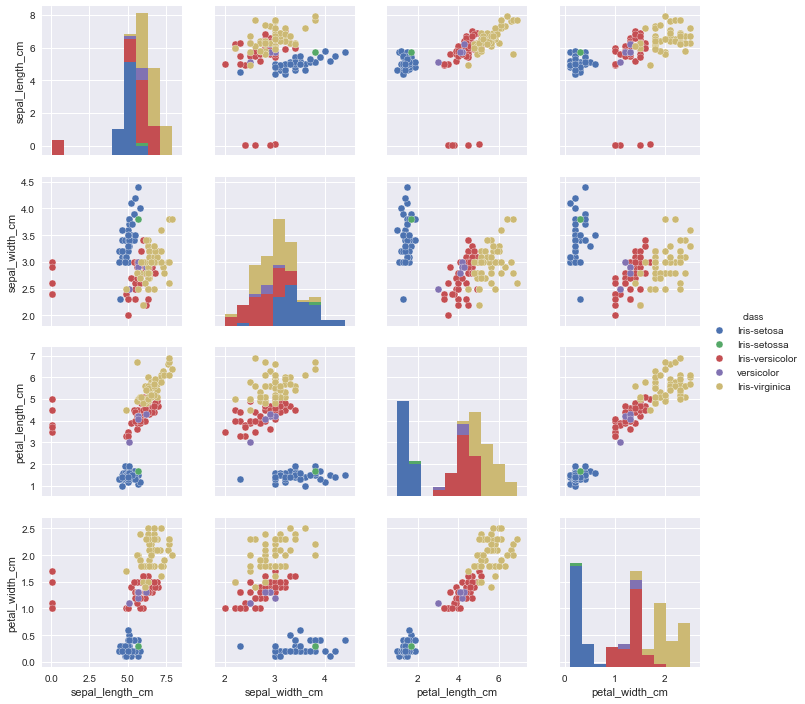

In [7]:
# Seaborn does not know how to deal with rows with missing values,
# that's why we did away with them already.
# sb.pairplot(no_null, hue='class')
sb.pairplot(iris_data.dropna(), hue='class')

We can clearly some of the problems from the graphs above:
- There are 5 classes where there should have only been 3.
- One <code>sepal_width_cm</code> for <code>Iris-setosa</code> falls well outside the range which can be seen in the plots in which <code>sepal_width_cm</code> is used as a parameter.
- Several <code>sepal_length_cm</code> entries for <code>Iris-versicolor</code> fall near zero.
We need to rectify these.
- We had to drop those rows with missing data.

## Step 3: Tidying the data
Let's fix the problems we pointed out.
First with the number of classes.
- There's a typo in the erroneous class <code>Iris-setossa</code> which can be fixed using indexing in dataframes.
- There's <code>Iris-</code> missing in <code>versicolor</code> class which can be appended for erroneous entries.

We will use <code>.loc</code> indexer for indexing purposes which uses 'Selection by label'. 

In [8]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Now, onto fixing erroneous data (or outliers). This can be **tricky**. Because, we can't say for whether this error was introduced at the time of collecting, recording or whether it is a real anomaly. So, we should be extra careful when dealing with outliers. If we decide to exclude such data, we need to make sure we document which data we excluded and also provide solid reasoning for excluding that data. (Because we can't just go around saying "This data didn't fit my hypothesis" and will not stand peer review).

Here, let's say that we know for a fact that the sepal width of an Iris-setosa flower cannot be less than 2.5 cm. So clearly, this was an error in either measurement or while recording it. We are better off discarding this data than spending hours and resources debugging where the mistake happened.

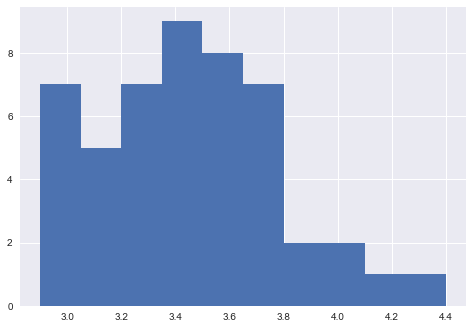

In [9]:
# Drops any 'Iris-setosa' rows with 'sepal_width_cm' < 2.5 cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

# The above statement works because .loc also takes a list of boolean values as a parameter

iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

Phew! Done with that.
The next issue we need to fix is several near-zero values of sepal length for <code>Iris-versicolor</code>. Let's take a look at them.

In [10]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & 
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


One strange observation is that all the values are off by orders of two magnitude. As if someone took the measurements in metres but forgot to convert them into cm. You need to talk to your data collection team regarding this. And apparently in this particular case, there was indeed that mistake made by the data collection team.
So, let's fix that.

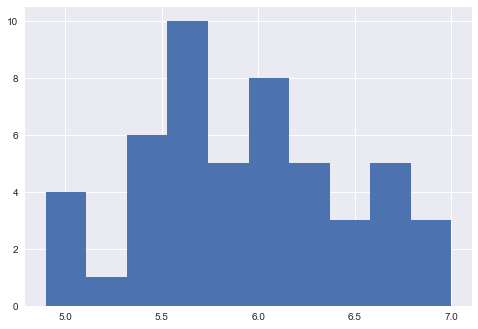

In [11]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
             (iris_data['sepal_length_cm'] < 1.0),
             'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [12]:
# shows rows with missing data in any of the columns
iris_data[iris_data['sepal_length_cm'].isnull() |
         iris_data['sepal_width_cm'].isnull() |
         iris_data['petal_length_cm'].isnull() |
         iris_data['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


It's not ideal that we had to drop those rows, especially considering they're all Iris-setosa entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same Iris type — this error could potentially bias our analysis.

One way to deal with missing data is **mean imputation**: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

Let's take a look at the data first.

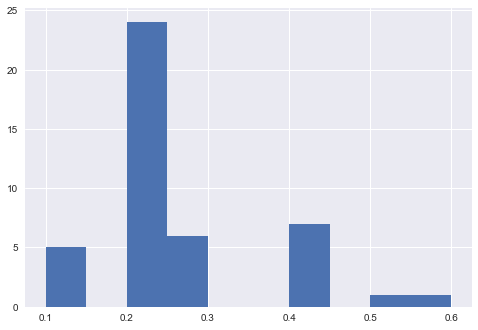

In [13]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [14]:
mean_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') & iris_data['petal_width_cm'].isnull(),
             'petal_width_cm'] = mean_petal_width

# Check if it has updated
iris_data.loc[(iris_data['class'] == 'Iris-setosa') & (iris_data['petal_width_cm'] == mean_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [15]:
# shows rows with missing data in any of the columns
iris_data[iris_data['sepal_length_cm'].isnull() |
         iris_data['sepal_width_cm'].isnull() |
         iris_data['petal_length_cm'].isnull() |
         iris_data['petal_width_cm'].isnull()]
# should return null

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


If you don't feel like imputing the data with the mean value, you can drop the missing value rows with dropna() call.
<pre><code>iris_data.dropna(inplace=True)</code></pre>

After all this, let's save the cleaned data to a new file so that we don't have to go through the same hassle again.

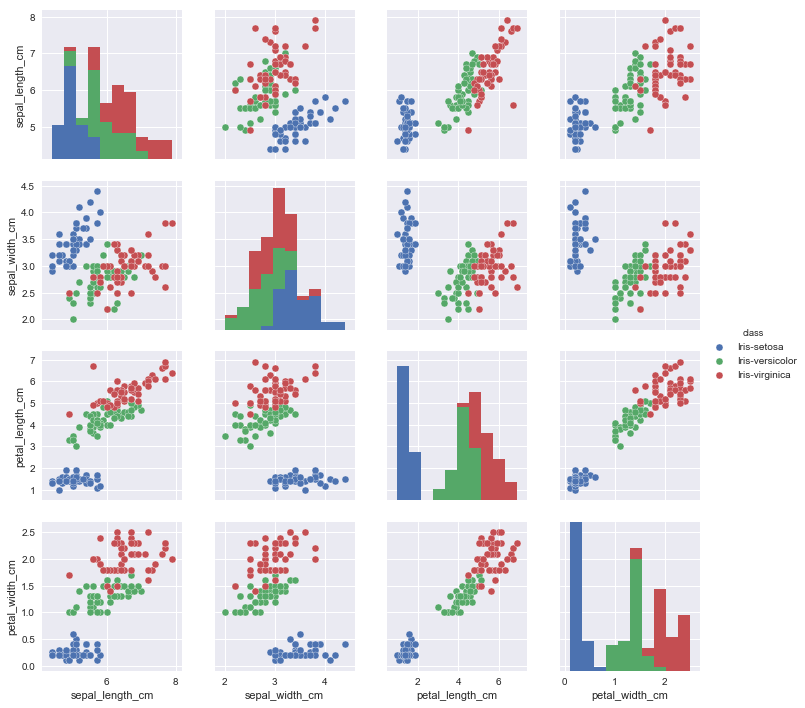

In [16]:
iris_data.to_csv('data/iris_data_clean.csv', index=False)

iris_data_clean = pd.read_csv('data/iris_data_clean.csv')

# Scatterplotmatrix for the cleaned data
sb.pairplot(iris_data_clean, hue='class')

Takeaways:
- Make sure the data is encoded properly
- Make sure the data falls in an expected range, use domain knowledge if possible to define this expected range
- Deal with missing data judiciously, replace it if you can or drop it.
- Never tidy the data manually. That way, you won't be able to reproduce them.
- Use code as a record of how the data was tidied. (This notebook serves a good purpose for that)
- Plot everything you can about the data at this stage of analysis so you can visually confirm everything is as it should be.

## Step 4: Testing our data
Just like running unit tests in many programming styles, we can quickly test our data using <code>assert</code> statements. This way, we would know if anything breaks due to changes made to the data.

It goes like this: We assert something. If it is <code>True</code>, the notebook continues running after it. However, if it is <code>False</code>, it will throw an error and we will know of any error before starting to actually analyse the data.

Following are the unit tests we need the data to pass.

In [17]:
# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

## Exploratory Analysis

Finally, we can start analysing our data!

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

- How is my data distributed?
- Are there any corelations in my data?
- Are there confounding factors that explain these corelations?

In this stage, we plot our data in as many ways as possible and in as many charts and graphs, but don't bother about making them pretty. They are just for internal use.

Let's look at the scatterplot from before again.

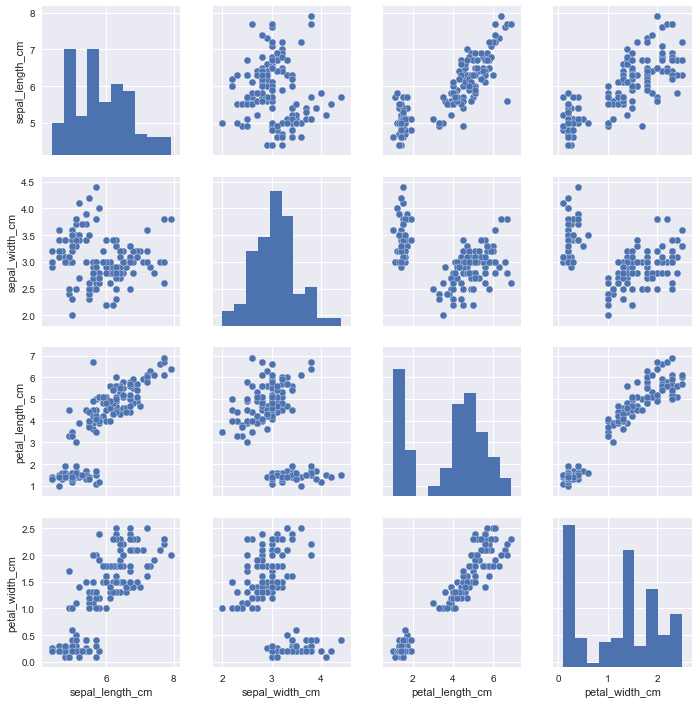

In [18]:
sb.pairplot(iris_data_clean)

Most of our data is normally distributed (bell curve) and it is good if we plan to use modelling methods which assume the data to be normally distributed.

However, the petal measurements show a strange behaviour. They have large values in the beginning, which is kind of not like normal distribution. One conclusion is that it may be for diferrent classes, hence the irregularity. So, let's color code them according to classes.

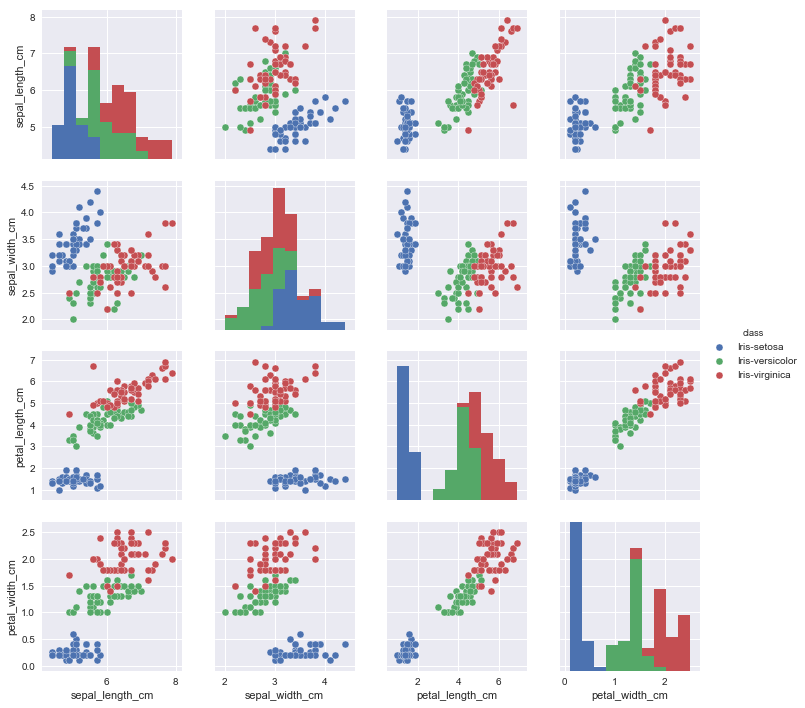

In [19]:
sb.pairplot(iris_data_clean, hue = 'class')

Surely, it was because of different classes that we were getting the strange distribution of petal lenghts and widths. But in a way, this helps to distinguish the <code>Iris-setosa</code> from the other <code>Iris</code> types.

However, the values for <code>Iris-versicolor</code> and <code>Iris-virginica</code> are overlapping for the most parts. This will be a problem in classifying them.

*There are also correlations between petal length and petal width, as well as sepal length and sepal width. The field biologists assure us that this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals.*

We can also make **violin** plots for different classes. Violin plots are similar to box plots (refer Wikipedia) but provide much more by scaling the box according to the density of data.

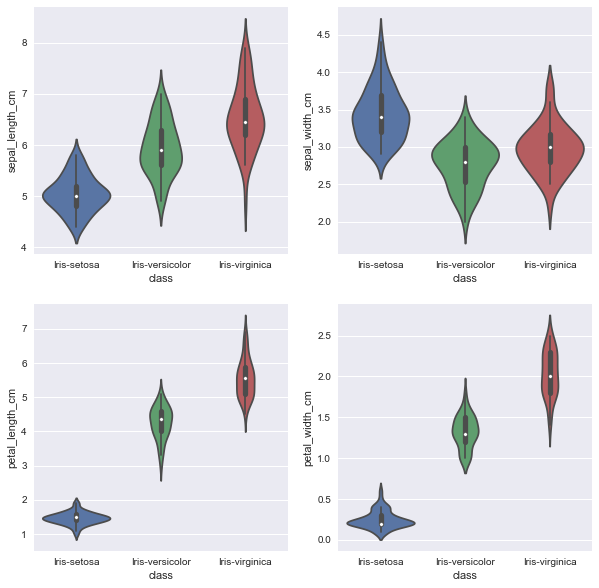

In [20]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2,2, column_index + 1)
    sb.violinplot(x = 'class', y = column, data = iris_data_clean)

## Step 5: Classification

As boring and tiring as the previous parts (tidying and analysing) seem, it is necessary.

Because **Bad data leads to bad models.**

Now, Let's fit our data with models.
Before that, we need to split our data in **training** and **testing** units.

I assume you already know the importance of this (to avoid overfitting and all). Now, let's get onto it.

In [21]:
# sklearn assumes data to be present in lists.
# So, we need to convert our data into lists. 'values' attribute does that.

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# To check
all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [22]:
# from sklearn.cross_validation import train_test_split
# The above module is deprecated. All functions have been transfered to the new module used below.

from sklearn.model_selection import train_test_split

# splits the data into training and testing sets based on 
(training_inputs, testing_inputs,
 training_classes, testing_classes) = train_test_split(all_inputs, all_classes, train_size = 0.75, random_state = 1)

#### Decision Tree Classifier
One of the basic classifiers used in ML is a **decision tree classifier**. It asks Yes/No questions about the data - each time getting closer to classfying the data.


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Test the classifier on the testing set
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

You might be happy about the 97% accuracy which you just got.
That might just be a fluke, depending on how the data was split into training and testing sets.
Go ahead and change the 'random_state' attribute to 0 and your accuracy would drop down to 86 - 89%.

So, let's try some more combinations and verify if our decision tree classifier is actually working great.

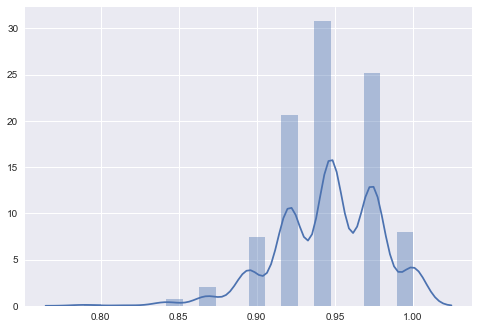

In [24]:
model_accuracies = []

for i in xrange(1000):
    (training_inputs, testing_inputs,
     training_classes, testing_classes) = train_test_split(all_inputs, all_classes, train_size = 0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(accuracy)
    
sb.distplot(model_accuracies)

Our accuracy varies because of **overfitting**. Our model becomes way too dependent on the training set so that it can't genelarize for new data that it sees.

## Step 6: Cross-Validation

We can avoid overfitting by cross-validation. Most of the data scientists use **k-fold cross-validation** for this purpose. Here, one of the k subsets of the data is used as a testing set and the model is trained on the remaining subsets. This process is repeated k times, so every set gets to be the testing set exactly once so that the model does not overfit.

10-fold CV is the most common choice.

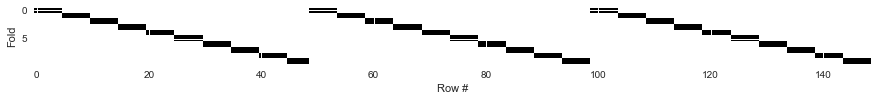

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-20 17:55:15.894867. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [130]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_labels):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_labels, dtype = bool)
        mask[test] = 1
        masks.append(mask)
    
#     print len(masks)
    plt.figure(figsize = (15,15))
    plt.imshow(masks, interpolation = 'none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')
    
plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

So, let's see what's happening here.

First about <code>StratifiedKFold</code>. So, it divides the entire dataset into training and testing sets, all while keeping the variance and proportion of all the classes almost the same across all sets.
So, it returns a list of **k** lists (or folds). This is taken by our custom fuction to represent the testing set in a more visual way. So, the black parts are the data points which are used for testing the performance of the model for each fold. 

The three groups are the three classes which we intend to classify, so it takes a bunch from each one of them so that the proportion is maintained.

[5 from each of 5 groups = 15 * 9 + 14 (for last fold) = all 149 data points covered]

**Bonus Tip**: You will get a deprecation warning as the <code>cross_validation</code> module will be deprecated from <code>sklearn</code> v 0.20, instead all the functions have been transferred to <code>model_selection</code> module. So, I tried importing <code>StratifiedKFold</code> but I just get my head around the similarities between the functions in two modules, so I stuck to the previous one because I can't implement the one from <code>model_selection</code>. So, a word of caution here: you might need to use the <code>model_selection</code> in the future if the other one becomes totally incompatible.

<code>sklearn</code> has a function to directly calculate the cv scores.

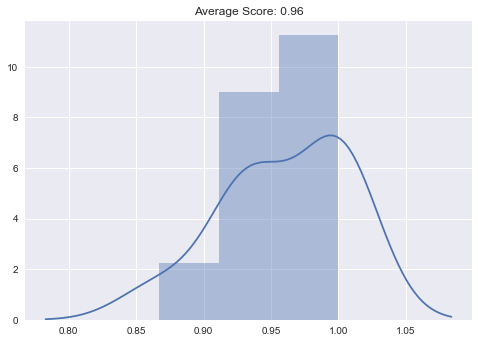

In [30]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# gives a list of scores for each of the cv folds
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title("Average Score: {}".format(np.mean(cv_scores)))

Now, this is much more consistent and reliable classifier which will generalize more easily than the previous model. So, CrossValidation rocks!

### Parameter Tuning

Now that our model is working with an acceptable rate of accuracy, is this the best we can do?
Every machine learning model comes with a set of parameters which can be tuned to improve its performance. For example, in case of decision trees, the depth of the tree is one such parameter. Let's see its effect on the performance.

What if we severely limit the depth of the decision tree?

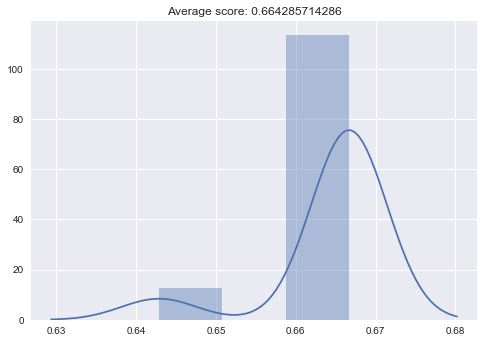

In [27]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv = 10)
sb.distplot(cv_scores)
plt.title("Average score: {}".format(np.mean(cv_scores)))

So, the classification drops tremendously if we limit the depth to 1.

But there needs to be a systematic way to determine the optimum parameters. One such (and the most common) method is **Grid Search**. What it essentially does is that it tries a bunch of parameters we pass to it and returns the best set of parameters.

Let's do this with our decision tree classifier. We will consider two params for now, depth and features.

In [94]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)

print "Best Score: {}".format(grid_search.best_score_)
print "Best params: {}".format(grid_search.best_params_)

Best Score: 0.959731543624
Best params: {'max_features': 4, 'max_depth': 3}


Now, I got a lot of different results every time I ran the above script. As the maximum number of features or depth increases, the performance improves which is quite understandable. It's like a trade off between performance and computation time (since it would increase if the structure complexity increases). But shouldn't it return the same value regardless of that. I was under the impression that it does the choosing for us. For now, I will put up a question on Stackexchange [insert link here later] and try to get to understand this better (Maybe somewhere some function is using a random seed or maybe it's a bug).

Now as Dr. Randal Olson would say, let's visualize the grid search.

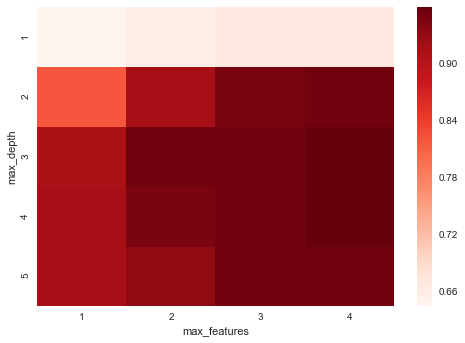

In [95]:
grid_visualization = []

# grid_scores is a list of tuples of possible params tried by grid_search
for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5,4)
sb.heatmap(grid_visualization, cmap='Reds')

# Credits - Randal Olson
# because I didn't type that out
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

We can see the effect of variation of the parameters on the accuracy. We need to atleast have a <code>max_depth</code> of 2. <code>max_features</code> does not make a lot of difference though. For our data, we have 4 features which is pretty good.

Now, let's do a more elaborate **grid search**.

In [101]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)

print "Best Score: {}".format(grid_search.best_score_)
print "Best params: {}".format(grid_search.best_params_)

Best Score: 0.959731543624
Best params: {'max_features': 4, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 3}


In [102]:
# Use the best params obtained from grid search for prediction
decision_tree_classifier = grid_search.best_estimator_
# take a look at the params
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Visualising Decision making using GraphViz

Graphviz can be used to visualize the decision making process done by the DTC (Decision Tree Classifier).

In [ ]:
from sklearn import tree

# can't find the use of the following line
# considering it to be not important, ignored it
# more info below

# from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    tree.export_graphviz(decision_tree_classifier, out_file = out_file)

The above piece of code generates graphs in the form of <code>.dot</code> files.

You can convert the dot files to <code>.png</code> files by:

<pre><code>dot -Tpng iris_dtc.dot -o iris_dtc.png</code></pre>

- You might need to install <code>graphviz</code> first with <code>apt-get</code>.

From what I found, StringIO gives file-like access to strings. The possible usecase if for some modules which only accept files, so you can open a string as if it's a file, make changes to it and you are done (e.g.: <code>gzip</code> module). The possible usecase here might be that since <code>dot</code> files are essentially strings which show the relation between nodes, and Randal Olson might have used a deprecated module, so probably that is the reason. 

Now that we have our classfier ready, let's visualize its performance.

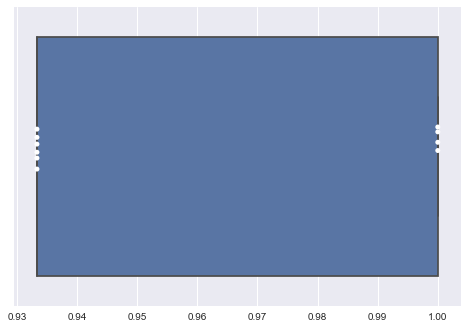

In [103]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv = 10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='white')

In [104]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5,10,25,50],
                 'criterion': ['gini', 'entropy'],
                 'max_features': [1,2,3,4],
                 'warm_start': [True, False]}

cross_validation = StratifiedKFold(all_classes ,n_folds=10)

grid_search = GridSearchCV(random_forest_classifier,
                          param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(all_inputs, all_classes)
print "Best score: {}".format(grid_search.best_score_)
print "Best params: {}".format(grid_search.best_params_)

random_forest_classifier = grid_search.best_estimator_
random_forest_classifier

Best score: 0.973154362416
Best params: {'max_features': 4, 'n_estimators': 5, 'criterion': 'gini', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)

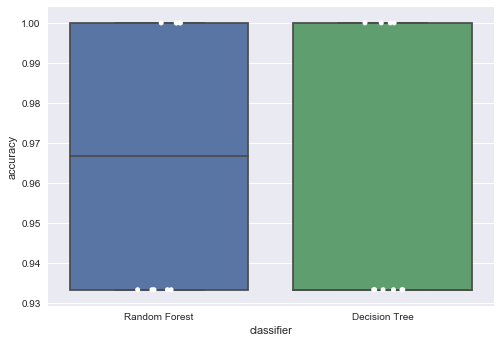

In [105]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

They almost perform the same. This is because we only have 4 features describing our data, and random forests show their magic when there are hundreds of features. So, there's not much improvement we can do here.

## Step 7: Reproducibility

We must always ensure that our analysis (work) can be reproduced later. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced.** And notebooks like these go a long way when making our work reproducible.

This notebook provides documentation and any figures along with the actual code.

Along with this, one must also record what software and hardware were used to perform the analysis.

There is a notebook tool named watermark, developed by **Sebastian Raschka** just for this.

Installation: <pre><code>pip install watermark</code></pre>

In [117]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [120]:
%watermark -a 'Ashish Rai' -nmv --packages numpy,pandas,matplotlib,seaborn,sklearn

Ashish Rai Mon Mar 20 2017 

CPython 2.7.6
IPython 5.3.0

numpy 1.12.0
pandas 0.19.2
matplotlib 2.0.0
seaborn 0.7.1
sklearn 0.18.1

compiler   : GCC 4.8.4
system     : Linux
release    : 4.4.0-66-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-20 16:53:00.930830. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Finally, extracting the entire code in a single pipeline.

[ 5.2  2.7  3.9  1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.1  3.8  1.9  0.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.5  2.3  4.   1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 7.2  3.   5.8  1.6]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 4.6  3.6  1.   0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 7.   3.2  4.7  1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.8  2.7  3.9  1.2]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.   3.5  1.6  0.6]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.    3.4   1.5   0.25]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 4.6  3.2  1.4  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)


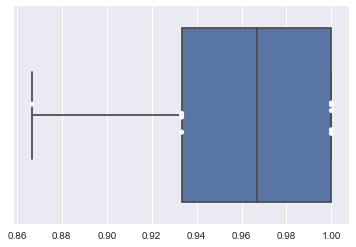

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-03-20 17:13:53.124706. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [128]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
# for why I used two different modules, see notes above

# We can directly use the cleaned data
iris_data_clean = pd.read_csv('data/iris_data_clean.csv',)

## Testing the data

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

# load the inputs and classes (targets)
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# we will use the random_forest_classifier returned by GridSearchCV
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                                  max_depth=None, max_features=4, max_leaf_nodes=None,
                                                  min_impurity_split=1e-07, min_samples_leaf=1,
                                                  min_samples_split=2, min_weight_fraction_leaf=0.0,
                                                  n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
                                                  verbose=0, warm_start=True)

# Let's plot the cross validation scores
rfc_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv = 10)
sb.boxplot(rfc_scores)
sb.stripplot(rfc_scores, jitter = True, color = 'white')

# let's show some predictions on the dataset that we have
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

Finally, we have a complete and reproducible pipeline which has over 90% accuracy and can also handle new input data as it is generated.